# Using the Elexon API

"ELEXON is a not-for-profit company created to fulfil the role of the Balancing and Settlement Code Company.  It procures and provides services to administer and implement the balancing and settlement rules that enable and support the wholesale market in electricity."

Elexon handles the UK wholesale electricity market, as part of their role they provide a range of data streams about the grid. In this part of the tutorial we'll look at the data stream relating to the output of individual generators.

<br>

The BMRS API Guide can be found <a href="https://www.elexon.co.uk/documents/training-guidance/bsc-guidance-notes/bmrs-api-and-data-push-user-guide-2/">here</a>.

You can register to recieve your API key <a href="https://www.elexonportal.co.uk/registration/newuser">here</a>.

<br>

### Imports

In [1]:
import pandas as pd
import numpy as np

import requests
import json
import xmltodict

from datetime import datetime, date

import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap

<br>

### Constructing the URL

We'll use f-strings (formatted strings) to input the values of parameters in the URL.

In [2]:
month = 3
f'Month: {month}'

'Month: 3'

In [3]:
api_key = 'bcz568ze0fnmog3'
query_date = '2018-12-31'
SP = 1
unit_id = '*'

query_args = {
    'APIKey' : f'{api_key}', 
    'SettlementDate' : f'{query_date}',
    'Period' : f'{SP}',
    'NGCBMUnitID' : f'{unit_id}',
    'ServiceType' : 'xml'
}

for key in query_args.keys():
    print(f'{key}: {query_args[key]}')

APIKey: bcz568ze0fnmog3
SettlementDate: 2018-12-31
Period: 1
NGCBMUnitID: *
ServiceType: xml


In [4]:
url_str = 'https://api.bmreports.com/BMRS/B1610/v1?'

for key in query_args.keys():
    url_str += f'{key}={query_args[key]}&'
    
url_str[:-1]

'https://api.bmreports.com/BMRS/B1610/v1?APIKey=bcz568ze0fnmog3&SettlementDate=2018-12-31&Period=1&NGCBMUnitID=*&ServiceType=xml'

<br>

### Making the Request and Parsing the Response

In [5]:
response = requests.get(url_str[:-1])
#response.text

In [6]:
r_dict = xmltodict.parse(response.text)['response']['responseBody']['responseList']['item']
#r_dict

In [7]:
df = pd.DataFrame(r_dict)
df.head()

,documentType,businessType,processType,timeSeriesID,quantity,curveType,resolution,settlementDate,settlementPeriod,powerSystemResourceType,registeredResourceEICCode,marketGenerationUnitEICCode,marketGenerationBMUId,marketGenerationNGCBMUId,bMUnitID,nGCBMUnitID,activeFlag,documentID,documentRevNum
0,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-274,103.42,Sequential fixed size block,PT30M,2018-12-31,1,Generation,48W0000GYMRO-17K,48W0000GYMRO-17K,T_GYMR-17,GYMRO-17,T_GYMR-17,GYMRO-17,Y,ELX-EMFIP-AGOG-20086758,1
1,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-275,116.36,Sequential fixed size block,PT30M,2018-12-31,1,Generation,48W0000GYMRO-26J,48W0000GYMRO-26J,T_GYMR-26,GYMRO-26,T_GYMR-26,GYMRO-26,Y,ELX-EMFIP-AGOG-20086758,1
2,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-276,121.56,Sequential fixed size block,PT30M,2018-12-31,1,Generation,48W0000GYMRO-28F,48W0000GYMRO-28F,T_GYMR-28,GYMRO-28,T_GYMR-28,GYMRO-28,Y,ELX-EMFIP-AGOG-20086758,1
3,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-183,128.54,Sequential fixed size block,PT30M,2018-12-31,1,Generation,48W00000LNMTH-1R,48W00000LNMTH-1R,E_LYNE1,LNMTH-1,E_LYNE1,LNMTH-1,Y,ELX-EMFIP-AGOG-20086758,1
4,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-184,125.34,Sequential fixed size block,PT30M,2018-12-31,1,Generation,48W00000LNMTH-2P,48W00000LNMTH-2P,E_LYNE2,LNMTH-2,E_LYNE2,LNMTH-2,Y,ELX-EMFIP-AGOG-20086758,1


<br>

### Creating List of Dates to Iterate Over

Python has a module which makes it easier to construct and extract information from datetimes

In [8]:
query_date = date(2019, 4, 7)
query_date

datetime.date(2019, 4, 7)

In [9]:
query_date.weekday() # For .weekday() Monday is 0 and Sunday is 6

6

<br>

We can also use the datetime module to construct strings for us

<a href="https://www.programiz.com/python-programming/datetime/strftime#format-code">String formatting codes</a>

In [10]:
datetime.strftime(query_date, '%A %d %B')

'Sunday 07 April'

In [11]:
date_string = datetime.strftime(query_date, '%Y-%m-%d')
date_string

'2019-04-07'

<br>

Pandas lets us create arrays of dates with a defined start and end

In [12]:
start_date = '2018-12-01'
end_date = '2018-12-07'

dt_rng = pd.date_range(start_date, end_date, freq='D')
dt_rng

DatetimeIndex(['2018-12-01', '2018-12-02', '2018-12-03', '2018-12-04',
               '2018-12-05', '2018-12-06', '2018-12-07'],
              dtype='datetime64[ns]', freq='D')

<br>

Next we format each of the dates and format them as strings the API can accept

In [13]:
query_dates = []

for query_date in dt_rng:
    query_dates += [datetime.strftime(query_date, '%Y-%m-%d')]
    
query_dates

['2018-12-01',
 '2018-12-02',
 '2018-12-03',
 '2018-12-04',
 '2018-12-05',
 '2018-12-06',
 '2018-12-07']

<br>

We can also write for loops in a single line

In [14]:
nums = [1, 2, 3, 4]
[num + 1 for num in nums]

[2, 3, 4, 5]

In [15]:
query_dates = [datetime.strftime(query_date, '%Y-%m-%d') for query_date in dt_rng]
query_dates

['2018-12-01',
 '2018-12-02',
 '2018-12-03',
 '2018-12-04',
 '2018-12-05',
 '2018-12-06',
 '2018-12-07']

<br>

We'll now wrap this process into a single function which accepts the start and end dates then returns the list of strings

In [16]:
def date_rng_2_date_strings(start_date, end_date):
    dt_rng = pd.date_range(start_date, end_date, freq='D')
    query_dates = [datetime.strftime(query_date, '%Y-%m-%d') for query_date in dt_rng]
    return query_dates
    
start_date = '2017-12-01'
end_date = '2017-12-03'

date_rng_2_date_strings(start_date, end_date)

['2017-12-01', '2017-12-02', '2017-12-03']

<br>

As well as iterating over the dates we'll have to iterate over each half hour settlement period (SP) in the day

In [17]:
list(range(0, 5))

[0, 1, 2, 3, 4]

In [18]:
SPs = list(range(1, 49))

<br>

### Running Iterative Requests Over a Datetime Range

In [19]:
def construct_API_url(api_key, query_date, SP, unit_id='*'):
    query_args = {
        'APIKey' : f'{api_key}', 
        'SettlementDate' : f'{query_date}',
        'Period' : f'{SP}',
        'NGCBMUnitID' : f'{unit_id}',
        'ServiceType' : 'xml'
    }

    url_str = 'https://api.bmreports.com/BMRS/B1610/v1?'

    for key in query_args.keys():
        url_str += f'{key}={query_args[key]}&'

    return url_str[:-1]

api_key = 'bcz568ze0fnmog3'
query_date = '2017-12-01'
SP = '1'

construct_API_url(api_key, query_date, SP)

'https://api.bmreports.com/BMRS/B1610/v1?APIKey=bcz568ze0fnmog3&SettlementDate=2017-12-01&Period=1&NGCBMUnitID=*&ServiceType=xml'

In [20]:
for query_date in query_dates:
    for SP in SPs:
        pass#print(construct_API_url(api_key, query_date, SP))

In [21]:
#%%time
## '%' in a Jupyter notebook denotes a magic command,  in this case requesting to time how long the cell takes to run

def B1610_request(api_key, query_date, SP, unit_id='*'):
    ## Constructing URL and Making Request
    url = construct_API_url(api_key, query_date, SP, unit_id)
    response = requests.get(url)

    ## Parsing Response into a Dictionary then Dataframe
    r_dict = xmltodict.parse(response.text)['response']['responseBody']['responseList']['item']
    df_datetime_gen = pd.DataFrame(r_dict)
    
    return df_datetime_gen

df_gen = pd.DataFrame()
query_dates = ['2018-12-01'] # date_rng_2_date_strings('2018-12-01', '2018-12-07') # <- To look at full week

for query_date in query_dates:
    for SP in SPs:
        df_datetime_gen = B1610_request(api_key, query_date, SP, unit_id='*')
        df_gen = df_gen.append(df_datetime_gen)
        
df_gen = df_gen.reset_index(drop=True)
print(df_gen.shape[0])

6529


In [32]:
df_gen.head()

,documentType,businessType,processType,timeSeriesID,quantity,curveType,resolution,settlementDate,settlementPeriod,powerSystemResourceType,registeredResourceEICCode,marketGenerationUnitEICCode,marketGenerationBMUId,marketGenerationNGCBMUId,bMUnitID,nGCBMUnitID,activeFlag,documentID,documentRevNum
0,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-330,143.51,Sequential fixed size block,PT30M,2018-12-01,1,Generation,48W00000SHRSO-1Y,48W00000SHRSO-1Y,T_SHRSW-1,SHRSO-1,T_SHRSW-1,SHRSO-1,Y,ELX-EMFIP-AGOG-19892046,1
1,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-331,150.85,Sequential fixed size block,PT30M,2018-12-01,1,Generation,48W00000SHRSO-2W,48W00000SHRSO-2W,T_SHRSW-2,SHRSO-2,T_SHRSW-2,SHRSO-2,Y,ELX-EMFIP-AGOG-19892046,1
2,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-173,11.934,Sequential fixed size block,PT30M,2018-12-01,1,Generation,48W00000GFLDW-11,48W00000GFLDW-11,E_GFLDW-1,GFLDW-1,E_GFLDW-1,GFLDW-1,Y,ELX-EMFIP-AGOG-19892046,1
3,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-293,8.898,Sequential fixed size block,PT30M,2018-12-01,1,Generation,48W00000HRSTW-19,48W00000HRSTW-19,T_HRSTW-1,HRSTW-1,T_HRSTW-1,HRSTW-1,Y,ELX-EMFIP-AGOG-19892046,1
4,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-306,22.744,Sequential fixed size block,PT30M,2018-12-01,1,Generation,48W00000LCLTW-1D,48W00000LCLTW-1D,T_LCLTW-1,LCLTW-1,T_LCLTW-1,LCLTW-1,Y,ELX-EMFIP-AGOG-19892046,1


<br>
<br>

# Scraping the Crown Estate Wind Farm Map

https://www.thecrownestate.co.uk/en-gb/our-places/asset-map/

In [23]:
url = 'https://www.thecrownestate.co.uk/api/energy-map/wind-farm-data'

headers = {
    'APIKey':'23k4jb32kb235kh'
}

response = requests.get(url, headers=headers) 
response_json = response.json()

In [24]:
response_json.keys()

dict_keys(['Nationaldataset', 'WindFarms', 'Winds'])

In [25]:
response_json['WindFarms'][0]

{'Id': 'RREW-1',
 'Name': 'Robin Rigg East',
 'Latitude': '54.763880',
 'Longitude': '-3.697027',
 'OutputPercentage': '21.67%',
 'Output': '19.5',
 'WindFarmImage': None,
 'Coordinates': '"-3.67755299999993,54.7522050000001", "-3.69013699999994,54.74431", "-3.69183702899994,54.7447469420001", "-3.70505799999995,54.7481450000001", "-3.70505665599995,54.748146654", "-3.70173299999993,54.752237", "-3.73993699999994,54.76293", "-3.68454199999996,54.782793", "-3.66930799999994,54.772748", "-3.67755299999993,54.7522050000001"',
 'PolygonOverlay': '',
 'Operator': 'EON C&R UK Robin Rigg East Ltd',
 'OperatorLogoLarge': None,
 'OperatorLogoSmall': None,
 'NumberOfTurbines': '30',
 'TurbineTypeBrand': '',
 'TurbineTypeModel': 'V90-3.0 MW',
 'OperatorWebsite': '',
 'OperatorWebsiteLabel': '',
 'WindFarmLocationImage': None,
 'TurbineCordinates': '"-3.70051665399995,54.7714999990001"; "-3.69344998799994,54.769916666"; "-3.70933332199996,54.7691666650001"; "-3.70313331999995,54.767599998"; "-3.69

In [26]:
json_keys = response_json['WindFarms'][0].keys()
df_windfarms = pd.DataFrame(index=json_keys)

for windfarm in response_json['WindFarms']:
    df_windfarms[windfarm['Id']] = pd.Series(windfarm)
    
df_windfarms = df_windfarms.T#.drop(columns=['Id'])
df_windfarms.head()

,Id,Name,Latitude,Longitude,OutputPercentage,Output,WindFarmImage,Coordinates,PolygonOverlay,Operator,OperatorLogoLarge,OperatorLogoSmall,NumberOfTurbines,TurbineTypeBrand,TurbineTypeModel,OperatorWebsite,OperatorWebsiteLabel,WindFarmLocationImage,TurbineCordinates,SiteCapacity
RREW-1,RREW-1,Robin Rigg East,54.763880,-3.697027,21.67%,19.5,None,"""-3.67755299999993,54.7522050000001"", ""-3.6901...",,EON C&R UK Robin Rigg East Ltd,None,None,30,,V90-3.0 MW,,,None,"""-3.70051665399995,54.7714999990001""; ""-3.6934...",90
RRWW-1,RRWW-1,Robin Rigg West,54.746869,-3.726277,30.56%,27.5,None,"""-3.70257999999995,54.735373"", ""-3.74204999999...",,EON C&R UK Robin Rigg West Ltd,None,None,30,,V90-3.0 MW,,,None,"""-3.74017264399993,54.7588475970001""; ""-3.7332...",90
WLNYO-2,WLNYO-2,Walney 2,54.081037,-3.604309,10.87%,20.0,None,"""-3.53594317099993,54.07430622"", ""-3.563399999...",,Walney (UK) Offshore Windfarms Ltd.,None,None,51,,SWT-3.6-120,,,None,"""-3.54176680499995,54.0790140280001""; ""-3.5506...",184
WLNYW-1,WLNYW-1,Walney 1,54.040489,-3.512528,11.03%,20.3,None,"""-3.44551246799995,54.0293461960001"", ""-3.5259...",,Walney (UK) Offshore Windfarms Ltd.,None,None,51,,SWT-3.6-107,,,None,"""-3.44731301199994,54.0299252070001""; ""-3.4558...",184
WDNSW,WDNSW,West of Duddon Sands,53.984042,-3.464347,12.34%,48.0,None,"""-3.37998099999993,53.972447"", ""-3.42291599999...",,ScottishPower Renewables (WoDS) Limited and Do...,None,None,108,,SWT-3.6-120,,,None,"""-3.42734691899994,53.965460137""; ""-3.42158698...",389


<br>



In [27]:
s_correct_id_bool = (df_windfarms.index == df_windfarms.Id) # Can also use np.equal(df_windfarms.index.values, df_windfarms.Id.values)

s_correct_id_bool.shape[0] == s_correct_id_bool.sum()

True

<br>

We can list the individual operators for each of the wind farms and filter for them.

In [28]:
df_windfarms['Operator'].unique()

array(['EON C&R UK Robin Rigg East Ltd', 'EON C&R UK Robin Rigg West Ltd',
       'Walney (UK) Offshore Windfarms Ltd.',
       'ScottishPower Renewables (WoDS) Limited and Dong Energy West of Duddon Sands (UK) Limited',
       'Barrow Offshore Wind Ltd', 'Ormonde Energy Ltd',
       'Rhyl Flats Wind Farm Limited', 'NWP Offshore Limited',
       'Gwynt y Mor Offshore Windfarm',
       'Dong Energy Burbo Extension (UK) Limited',
       'DONG Energy Burbo (UK) Limited', 'Gunfleet Sands Limited',
       'Gunfleet Sands II Ltd', 'Kentish Flats Limited',
       'Vattenfall Wind Power Limited', 'London Array Limited',
       'Thanet Offshore Wind Limited', 'Greater Gabbard Offshore Winds',
       'Eon Climate & Renewables UK OW', 'SCIRA Offshore Energy Limited',
       'Lincs Wind Farm Limited', 'Dudgeon Offshore Wind Ltd',
       'E.ON Climate & Renewables UK Humber Wind Limited',
       'Westermost Rough Ltd', 'Lynn Wind Farm Ltd',
       'Inner Dowsing Wind Farm Ltd', 'EDF', 'Galloper Win

In [29]:
s_EDF_bool = df_windfarms['Operator'].str.contains('EON')
df_windfarms[s_EDF_bool]

,Id,Name,Latitude,Longitude,OutputPercentage,Output,WindFarmImage,Coordinates,PolygonOverlay,Operator,OperatorLogoLarge,OperatorLogoSmall,NumberOfTurbines,TurbineTypeBrand,TurbineTypeModel,OperatorWebsite,OperatorWebsiteLabel,WindFarmLocationImage,TurbineCordinates,SiteCapacity
RREW-1,RREW-1,Robin Rigg East,54.763880,-3.697027,21.67%,19.5,None,"""-3.67755299999993,54.7522050000001"", ""-3.6901...",,EON C&R UK Robin Rigg East Ltd,None,None,30,,V90-3.0 MW,,,None,"""-3.70051665399995,54.7714999990001""; ""-3.6934...",90
RRWW-1,RRWW-1,Robin Rigg West,54.746869,-3.726277,30.56%,27.5,None,"""-3.70257999999995,54.735373"", ""-3.74204999999...",,EON C&R UK Robin Rigg West Ltd,None,None,30,,V90-3.0 MW,,,None,"""-3.74017264399993,54.7588475970001""; ""-3.7332...",90


<br>

By default Pandas is reading in all of the columns in this data as string objects, we can reformat some of them as numeric columns.

In [30]:
df_windfarms.dtypes

Id                       object
Name                     object
Latitude                 object
Longitude                object
OutputPercentage         object
Output                   object
WindFarmImage            object
Coordinates              object
PolygonOverlay           object
Operator                 object
OperatorLogoLarge        object
OperatorLogoSmall        object
NumberOfTurbines         object
TurbineTypeBrand         object
TurbineTypeModel         object
OperatorWebsite          object
OperatorWebsiteLabel     object
WindFarmLocationImage    object
TurbineCordinates        object
SiteCapacity             object
dtype: object

In [37]:
numeric_cols = ['Latitude', 'Longitude', 'NumberOfTurbines', 'SiteCapacity']

for numeric_col in numeric_cols:
    df_windfarms[numeric_col] = df_windfarms[numeric_col].astype(float)

df_windfarms.dtypes

Id                        object
Name                      object
Latitude                 float64
Longitude                float64
OutputPercentage          object
Output                    object
WindFarmImage             object
Coordinates               object
PolygonOverlay            object
Operator                  object
OperatorLogoLarge         object
OperatorLogoSmall         object
NumberOfTurbines         float64
TurbineTypeBrand          object
TurbineTypeModel          object
OperatorWebsite           object
OperatorWebsiteLabel      object
WindFarmLocationImage     object
TurbineCordinates         object
SiteCapacity             float64
dtype: object

<br>

We can identify the largest windfarms using .sort_values()

In [38]:
df_windfarms.sort_values('SiteCapacity', ascending=False).head()

,Id,Name,Latitude,Longitude,OutputPercentage,Output,WindFarmImage,Coordinates,PolygonOverlay,Operator,OperatorLogoLarge,OperatorLogoSmall,NumberOfTurbines,TurbineTypeBrand,TurbineTypeModel,OperatorWebsite,OperatorWebsiteLabel,WindFarmLocationImage,TurbineCordinates,SiteCapacity
LARYO,LARYO,London Array 1,51.625553,1.496327,0,0.0,None,"""1.58153000000004,51.5774210000001"", ""1.528915...",,London Array Limited,None,None,175.0,,SWT-3.6-120,,,None,"""1.45759028700007,51.578589778""; ""1.4503018610...",630.0
GYMRW,GYMRW,Gwynt y Mor,53.458829,-3.584275,13.02%,75.0,None,"""-3.59688699999998,53.4225210000001"", ""-3.6141...",,Gwynt y Mor Offshore Windfarm,None,None,160.0,,SWT-3.6-107,,,None,"""-3.61130184599995,53.490076946""; ""-3.60047113...",576.0
RCBKO,RCBKO,Race Bank,53.276000,0.841000,2.23%,12.8,None,"""0.933186000000035,53.262006"", ""0.895833000000...",,Race Bank Wind Farm Limited,None,None,91.0,,SWT-6.0–154,,,None,"""0.878533,53.269261""; ""0.877681,53.235232""; ""0...",574.0
GRGBW,GRGBW,Greater Gabbard,51.883892,1.935857,0.6%,3.0,None,"""2.00000000000006,51.9785000000001"", ""2.000000...",,Greater Gabbard Offshore Winds,None,None,140.0,,SWT-3.6-107,,,None,"""1.93168677500006,51.7828011890001""; ""1.926872...",504.0
HDWAO,HDWAO,Hornsea One (Central Phase),53.881312,1.912505,,,None,"""1.865947,53.939686"", ""1.881745,53.925366"", ""1...",,Ørsted,None,None,58.0,Siemens Gamesa,SWT-7.0-154,,,None,"""1.841032,53.858145""; ""1.854224,53.846186""; ""1...",406.0


<br>

### Plotting Generation of Single Windfarm

We can use the Elexon we previously downloaded to look at what the load profile for London Array was on that day

In [39]:
df_LARYO = df_gen[df_gen.nGCBMUnitID.str.contains('LARYO')].copy()
df_LARYO.head()

,documentType,businessType,processType,timeSeriesID,quantity,curveType,resolution,settlementDate,settlementPeriod,powerSystemResourceType,registeredResourceEICCode,marketGenerationUnitEICCode,marketGenerationBMUId,marketGenerationNGCBMUId,bMUnitID,nGCBMUnitID,activeFlag,documentID,documentRevNum
118,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-302,72.618,Sequential fixed size block,PT30M,2018-12-01,1,Generation,48W00000LARYO-1Z,48W00000LARYO-1Z,T_LARYW-1,LARYO-1,T_LARYW-1,LARYO-1,Y,ELX-EMFIP-AGOG-19892046,1
119,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-303,111.4,Sequential fixed size block,PT30M,2018-12-01,1,Generation,48W00000LARYO-2X,48W00000LARYO-2X,T_LARYW-2,LARYO-2,T_LARYW-2,LARYO-2,Y,ELX-EMFIP-AGOG-19892046,1
127,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-304,118.02,Sequential fixed size block,PT30M,2018-12-01,1,Generation,48W00000LARYO-3V,48W00000LARYO-3V,T_LARYW-3,LARYO-3,T_LARYW-3,LARYO-3,Y,ELX-EMFIP-AGOG-19892046,1
128,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-305,110.82,Sequential fixed size block,PT30M,2018-12-01,1,Generation,48W00000LARYO-4T,48W00000LARYO-4T,T_LARYW-4,LARYO-4,T_LARYW-4,LARYO-4,Y,ELX-EMFIP-AGOG-19892046,1
247,Actual generation,Production,Realised,ELX-EMFIP-AGOG-TS-665,78.64,Sequential fixed size block,PT30M,2018-12-01,2,Generation,48W00000LARYO-1Z,48W00000LARYO-1Z,T_LARYW-1,LARYO-1,T_LARYW-1,LARYO-1,Y,ELX-EMFIP-AGOG-19892046,1


In [40]:
def form_datetime(df_gen, SP_col='settlementPeriod', date_col='settlementDate'):
    s_SP = df_gen[SP_col].astype(int)
    s_hour = ((s_SP - 1) / 2)
    s_half_hour = ((s_SP - 1) % 2)*30

    s_datetime = pd.to_datetime(df_gen[date_col] + ' ' + s_hour.astype(str) + ':' + s_half_hour.astype(str))
    return s_datetime

s_datetime = form_datetime(df_gen)
s_datetime.loc[1000:1005]

1000   2018-12-01 04:00:00
1001   2018-12-01 04:00:00
1002   2018-12-01 04:00:00
1003   2018-12-01 04:00:00
1004   2018-12-01 04:00:00
1005   2018-12-01 04:00:00
dtype: datetime64[ns]

In [41]:
df_LARYO['datetime'] = s_datetime
df_LARYO[['datetime', 'quantity', 'nGCBMUnitID']].head()

,datetime,quantity,nGCBMUnitID
118,2018-12-01 00:00:00,72.618,LARYO-1
119,2018-12-01 00:00:00,111.4,LARYO-2
127,2018-12-01 00:00:00,118.02,LARYO-3
128,2018-12-01 00:00:00,110.82,LARYO-4
247,2018-12-01 00:30:00,78.64,LARYO-1


In [42]:
df_LARYOs = df_LARYO[['datetime', 'quantity', 'nGCBMUnitID']].copy()
df_LARYOs['quantity'] = df_LARYOs['quantity'].astype(float)
df_LARYOs = df_LARYOs.pivot('datetime', 'nGCBMUnitID', 'quantity')
df_LARYOs.head()

nGCBMUnitID,LARYO-1,LARYO-2,LARYO-3,LARYO-4
datetime,,,,
2018-12-01 00:00:00,72.618,111.40,118.02,110.820
2018-12-01 00:30:00,78.640,115.14,118.38,108.580
2018-12-01 01:00:00,81.380,119.06,125.42,114.118
2018-12-01 01:30:00,71.960,107.76,98.96,93.760
2018-12-01 02:00:00,53.020,88.90,73.80,70.698


Text(0, 0.5, 'MW')

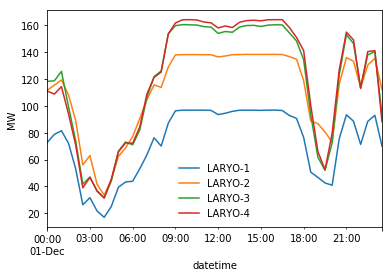

In [43]:
df_LARYOs.plot()
plt.legend(frameon=False)
plt.ylabel('MW')